In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from sklearn.utils import resample
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('labeled_data.csv')
data['label'] = data['class']
data = data.drop('class', axis=1)
data

,Unnamed: 0,count,hate_speech,offensive_language,neither,tweet,label
0,0,3,0,0,3,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,1,3,0,3,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,2,3,0,3,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,3,3,0,2,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,4,6,0,6,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
24779,25292,3,0,1,2,"you've gone and broke the wrong heart baby, an...",2
24780,25294,3,0,3,0,young buck wanna eat!!.. dat nigguh like I ain...,1
24781,25295,6,0,6,0,youu got wild bitches tellin you lies,1


In [3]:
data = data[['tweet', 'label']]
data

,tweet,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
24779,"you've gone and broke the wrong heart baby, an...",2
24780,young buck wanna eat!!.. dat nigguh like I ain...,1
24781,youu got wild bitches tellin you lies,1


In [4]:
data['label'] = np.where(data['label'] < 2, 1, 0)
data['label'].value_counts()

C:\Users\mass\AppData\Local\Temp\ipykernel_12752\1223604069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = np.where(data['label'] < 2, 1, 0)


1    20620
0     4163
Name: label, dtype: int64

In [5]:
data_maj = data[data.label==1]
data_min = data[data.label==0]
data_min
data_maj

,tweet,label
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1
5,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",1
...,...,...
24776,you're all niggers,1
24777,you're such a retard i hope you get type 2 dia...,1
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
24780,young buck wanna eat!!.. dat nigguh like I ain...,1


In [6]:
data2 = pd.read_csv('train_E6oV3lV.csv')

data2 = data2[data2.label == 0]
data2 = data2[['tweet', 'label']]
data2[:16458]

data2 = resample(data2,  replace=True,  n_samples = (16457), random_state=123)
data2

,tweet,label
21452,very impoant in the world full of violence!,0
16907,"arabic #aerobics: stay #fit, &amp; #healthy ...",0
30127,10 things that made me happy this week 10 thi...,0
19040,i finally found a way how to delete old tweets...,0
30781,"@user @user totally agree sarah, i turned it o...",0
...,...,...
9895,"now playing : rick wakeman - "" rohan"" on ...",0
14150,what will it take for these parents to underst...,0
28346,glad it worked well for you!!! please let me k...,0
14224,whoo hoo... #mustwatch for me.,0


In [7]:
data = pd.concat([data, data2], ignore_index=True)
data

,tweet,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,0
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1
...,...,...
41235,"now playing : rick wakeman - "" rohan"" on ...",0
41236,what will it take for these parents to underst...,0
41237,glad it worked well for you!!! please let me k...,0
41238,whoo hoo... #mustwatch for me.,0


In [8]:
data = data.sample(frac=1, random_state=42).reset_index(drop=True) # make a random dataset
data

,tweet,label
0,"gluten free beers, snacks and footie all the w...",0
1,stop stressing! weekend is finally here! :d ar...,0
2,RT @Bidenshairplugs: I'd like to issue a forma...,1
3,@user just discovered @user an iot #meetup gr...,0
4,RT @HoskinsTy96: @Vontey_isa_boss &#128514;&#1...,0
...,...,...
41235,@jkatz_ @kaylee_binion14 bitch. &#128534;,1
41236,"I'm going to sell my iPhone and both my Macs, ...",1
41237,i am thankful for family vacations. #thankful ...,0
41238,"#porn,#android,#iphone,#ipad,#sex,#xxx, | #Ana...",1


In [9]:
new_data = data.sample(frac=0.075, random_state=42).reset_index(drop=True)
new_data['label'].value_counts()

1    1556
0    1537
Name: label, dtype: int64

In [10]:
new_data.shape

(3093, 2)

In [11]:
new_data['tweet'] = new_data['tweet'].apply(lambda x : re.sub('^RT | (@[a-zA-Z0-9]+:) | @user', ' ', x))
new_data['tweet'] = new_data['tweet'].apply(lambda x : re.sub('[^a-zA-Z]', ' ', x))
new_data['tweet'] = new_data['tweet'].apply(lambda x : x.lower())


corpus = []
for i in range(0, 3093):
    text = new_data['tweet'][i].split()
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    corpus.append(text)

corpus

['shoot pussi bust pussi cume sooooooooooon',
 'obey jrock true ride die bitch http co bkwhx fkw fuck hahahahah',
 'keo gunnplay u kill carl nigga glenn who gonna take care hoe maggi',
 'stink must pussi ass nigga talkin shit tomyfacebro test',
 'omg pathet spineless ball piec trash twitter ever seen let go throw blah',
 'adolfhibsta ratchet ass bitch rt tmz nicki minaj smash boyfriend benz http co bxqd z nb http co gbgjiuiref',
 'get easili risk help health let neg emot get best health',
 'user cross alway front lie straight face day long religion buy',
 'jamesnasti readi rant gf dog tear women cant handl liquor get jealou club hoe',
 'help thank awesom cwc network amaz',
 'sunni pari love summer thursday even smile picoftheday',
 'playlist mood today heabreak jordach lim senti',
 'bihday sway bihday sway bihday bihday',
 'lol activ rt idgaf activ hoe long fuck man need learn mind busi',
 'mcwilliamsbrett ayyy tell bitch avi need fix flat dat flat ass',
 'yaboykip hope bitch catfish h

In [12]:
pos = []
neg = []
for i in range(0, 3000):
    if new_data['label'][i] == 1:
        neg.append(corpus[i])
    else :
        pos.append(corpus[i])    
pos  

['get easili risk help health let neg emot get best health',
 'user cross alway front lie straight face day long religion buy',
 'help thank awesom cwc network amaz',
 'sunni pari love summer thursday even smile picoftheday',
 'playlist mood today heabreak jordach lim senti',
 'bihday sway bihday sway bihday bihday',
 'happi work confer right mindset lead cultur develop organ work mindset',
 'lucki posit affirm',
 'bobross paint cabin littl predat cloakingdevic',
 'tonight anoth privat hen pay enteain york great locat llbemurd',
 'sad someon love never show love love life chanc braveri mindset',
 'cannot believ great group candid gop year end scum suck guy l',
 'well want',
 'darealwalt jr see jig',
 'hair launch soon wait show case wig',
 'mr damngood u gt natur biolog gt dog eat much bird everyth seem human term',
 'day kelowna bound scout new home pl let us find place live lol nervou excit happi allthefeel',
 'nigga even anymor',
 'friendli posit affirm',
 'user look like boyfriend 

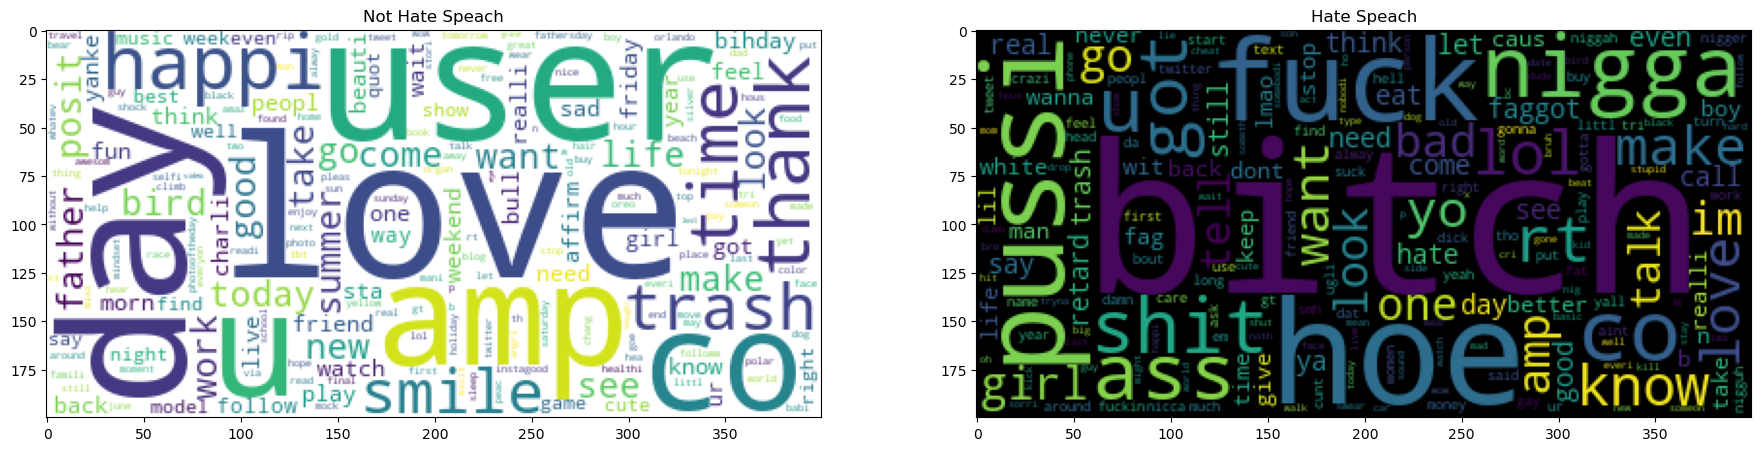

In [13]:
fig, axc = plt.subplots(1, 2, figsize=(22, 6)) # num of rows, num of cols
neg_wordcloud = WordCloud(collocations=False, background_color='black').generate(' '.join(neg))
pos_wordcloud = WordCloud(collocations=False, background_color='white').generate(' '.join(pos))

axc[0].imshow(pos_wordcloud)
axc[0].set_title('Not Hate Speach')

axc[1].imshow(neg_wordcloud)
axc[1].set_title('Hate Speach')

plt.show()

In [14]:
y = new_data['label']
cv = CountVectorizer(max_features=1000)
x = cv.fit_transform(corpus).toarray()
x.shape

(3093, 1000)

In [15]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [16]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(x_train, y_train)
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))

0.9991915925626516
0.9596122778675282


In [17]:
import pickle

# Saving the model
pickle.dump(rf, open('myModel.pkl', 'wb'))

pickle.dump(cv, open('vactorizer.pkl', 'wb'))



In [18]:

def preprocess_text(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Convert all the words to lowercase
    tokens = [word.lower() for word in tokens]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stem the words
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Join the tokens back into a string
    preprocessed_text = ' '.join(tokens)
    lst = []
    lst.append(preprocessed_text)
    return lst

x_new = preprocess_text('love world message')

xx = cv.transform(x_new).toarray()

xx.shape



(1, 1000)

In [19]:
y_hat = rf.predict_proba(xx)
y_hat[0]

array([0.91406826, 0.08593174])